In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
data = pd.read_csv('train_fresh.xls')

In [5]:
data.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


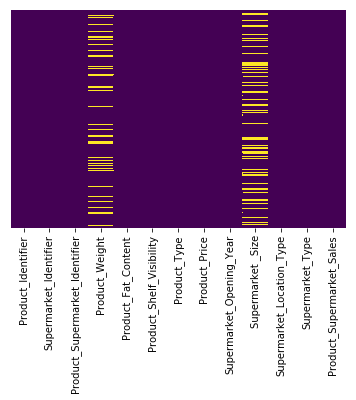

In [6]:
sns.heatmap(data.isnull(),yticklabels=False,cbar= False ,cmap= 'viridis')

In [7]:
data['Product_Weight'].fillna(data.groupby('Product_Fat_Content')['Product_Weight'].transform('mean'), inplace = True)

In [8]:
data.isnull().sum()

Product_Identifier                   0
Supermarket_Identifier               0
Product_Supermarket_Identifier       0
Product_Weight                       0
Product_Fat_Content                  0
Product_Shelf_Visibility             0
Product_Type                         0
Product_Price                        0
Supermarket_Opening_Year             0
Supermarket _Size                 1450
Supermarket_Location_Type            0
Supermarket_Type                     0
Product_Supermarket_Sales            0
dtype: int64

In [9]:
data.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [10]:
data.drop(['Product_Identifier','Supermarket_Identifier','Product_Supermarket_Identifier','Product_Type','Supermarket _Size'], axis =1, inplace = True)

In [11]:
data.head()

,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,11.6,Low Fat,0.068535,357.54,2005,Cluster 3,Grocery Store,709.08
1,11.6,Low Fat,0.040912,355.79,1994,Cluster 3,Supermarket Type1,6381.69
2,11.6,Low Fat,0.041178,350.79,2014,Cluster 2,Supermarket Type1,6381.69
3,11.6,Low Fat,0.041113,355.04,2016,Cluster 3,Supermarket Type2,2127.23
4,11.6,Ultra Low fat,0.000000,354.79,2011,Cluster 2,Supermarket Type1,2481.77


In [12]:
dum1 = pd.get_dummies(data['Product_Fat_Content'])

In [13]:
dum2 = pd.get_dummies(data['Supermarket_Location_Type'])

In [14]:
dum3 = pd.get_dummies(data['Supermarket_Type'])

In [ ]:
data = pd.concat([data,dum1,dum2,dum3],axis  = 1)

In [48]:
dum4 = pd.get_dummies(data['Product_Fat_Content'],drop_first=True)

KeyError: 'Product_Fat_Content'

In [35]:
from scipy.sparse import csr_matrix

In [44]:
sparse_d = csr_matrix(dum3)

In [47]:
pd.DataFrame({'A': sparse_d})

ValueError: If using all scalar values, you must pass an index

In [16]:
data.head()

,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales,Low Fat,Normal Fat,Ultra Low fat,Cluster 1,Cluster 2,Cluster 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,11.6,Low Fat,0.068535,357.54,2005,Cluster 3,Grocery Store,709.08,1,0,0,0,0,1,1,0,0,0
1,11.6,Low Fat,0.040912,355.79,1994,Cluster 3,Supermarket Type1,6381.69,1,0,0,0,0,1,0,1,0,0
2,11.6,Low Fat,0.041178,350.79,2014,Cluster 2,Supermarket Type1,6381.69,1,0,0,0,1,0,0,1,0,0
3,11.6,Low Fat,0.041113,355.04,2016,Cluster 3,Supermarket Type2,2127.23,1,0,0,0,0,1,0,0,1,0
4,11.6,Ultra Low fat,0.000000,354.79,2011,Cluster 2,Supermarket Type1,2481.77,0,0,1,0,1,0,0,1,0,0


In [17]:
data.drop(['Supermarket_Location_Type','Product_Fat_Content','Supermarket_Type'], axis =1, inplace = True)

In [18]:
data.to_csv('data_stop.xls')

In [19]:
data.drop('Supermarket_Opening_Year', axis =1, inplace = True)

In [20]:
data.columns

Index(['Product_Weight', 'Product_Shelf_Visibility', 'Product_Price',
       'Product_Supermarket_Sales', 'Low Fat', 'Normal Fat', 'Ultra Low fat',
       'Cluster 1', 'Cluster 2', 'Cluster 3', 'Grocery Store',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
      dtype='object')

In [21]:
X = data[['Product_Weight', 'Product_Shelf_Visibility', 'Product_Price','Low Fat', 'Normal Fat', 'Ultra Low fat','Cluster 1', 'Cluster 2', 'Cluster 3', 'Grocery Store','Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']]
y = data['Product_Supermarket_Sales']

In [22]:
from sklearn.cross_validation import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()

In [26]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
predictions = model.predict(X_test)

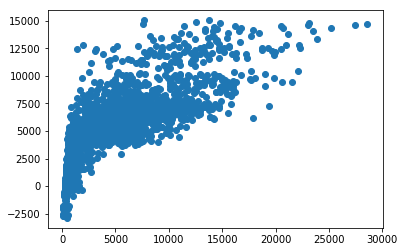

In [28]:
plt.scatter(y_test,predictions)

In [29]:
from sklearn.cross_validation import cross_val_score

In [30]:
scores = cross_val_score(model,X_test,y_test,cv =10)

In [31]:
scores

array([0.50091337, 0.50851996, 0.55860195, 0.4556951 , 0.51499078,
       0.52927626, 0.52405885, 0.60824184, 0.50525346, 0.57026727])

In [32]:
print(score.mean()*100)

NameError: name 'score' is not defined

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.mean_squared_error(y_test,predictions))

SVM

In [ ]:
from sklearn.svm import SVR

In [ ]:
model1 = SVR()

In [ ]:
model1.fit(X_train,y_train)

In [ ]:
svpred = model.predict(X_test)

In [ ]:
plt.scatter(y_test,svpred)

In [ ]:
from sklearn.cross_validation import cross_val_score
score = cross_val_score(model1,X_test,y_test,cv =10)

In [ ]:
score

In [ ]:
test1 = pd.read_csv('first_t.xls')

In [ ]:
test1.head()

In [ ]:
testpred = model.predict(test1)

In [ ]:
dat11  =pd.read_csv('submission_price.xls')

In [ ]:
dat11.drop('Product_Supermarket_Sales',axis = 1 , inplace = True)

In [ ]:
a = pd.DataFrame({'Product_Supermarket_Sales':testpred})

In [ ]:
submitted1 = pd.concat([dat11,a],axis =1)

In [ ]:
submitted1.to_csv('answer2.csv',index = False)

In [ ]:
submitted1.head()

In [ ]:
d = pd.read_csv('train_fresh.xls')

In [ ]:
d.head()

In [ ]:
d.groupby('Supermarket_Type').size()